In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error as mse 

In [2]:
import warnings 
warnings.filterwarnings("ignore") 

In [3]:
df_transactions = pd.read_csv('transactions.csv')
df_transactions.head()

,id,date,days_after_open,day_of_week,hours_after_open,drink_id,name,unit_price,quantity,raining,study_area_id,study_area_name,dist_to_cafe
0,0,2019-07-22,0,Mon,0,5,Flat White (L),4.9,1,No,3,Abercrombie (H70),700
1,1,2019-07-22,0,Mon,0,5,Flat White (L),4.9,1,No,1,Law Library (F10),84
2,2,2019-07-22,0,Mon,0,2,Macchiato,3.8,1,No,1,Law Library (F10),84
3,3,2019-07-22,0,Mon,0,2,Macchiato,3.8,1,No,5,Carslaw (F07),150
4,4,2019-07-22,0,Mon,0,5,Flat White (L),4.9,1,No,5,Carslaw (F07),150


# 1. Task 1

## 1.1 Seasonality

### 1.1.1 Days

In [4]:
df_transactions['revenue'] = df_transactions['unit_price'] * df_transactions['quantity']

In [5]:
hours_open = 6

total_rev_each_day = df_transactions.groupby(["day_of_week", 'date']).sum()['revenue']
mean_daily_rev = total_rev_each_day.reset_index(level=0).groupby('day_of_week').mean()

mean_daily_rev
#daily average

,revenue
day_of_week,
Fri,925.368182
Mon,873.927273
Sat,875.563636
Sun,899.559091
Thu,997.604545
Tue,944.918182
Wed,1063.763636


In [6]:
hours_open = 6

total_rev_each_day = df_transactions.groupby(["day_of_week", 'date']).sum()['revenue']
mean_daily_rev = total_rev_each_day.reset_index(level=0).groupby('day_of_week').mean()
mean_daily_rev_ph = mean_daily_rev/hours_open

mean_daily_rev_ph
#hourly average

,revenue
day_of_week,
Fri,154.228030
Mon,145.654545
Sat,145.927273
Sun,149.926515
Thu,166.267424
Tue,157.486364
Wed,177.293939


In [7]:
mean_daily_rev,mean_daily_rev_ph

(                 revenue
 day_of_week             
 Fri           925.368182
 Mon           873.927273
 Sat           875.563636
 Sun           899.559091
 Thu           997.604545
 Tue           944.918182
 Wed          1063.763636,
                 revenue
 day_of_week            
 Fri          154.228030
 Mon          145.654545
 Sat          145.927273
 Sun          149.926515
 Thu          166.267424
 Tue          157.486364
 Wed          177.293939)

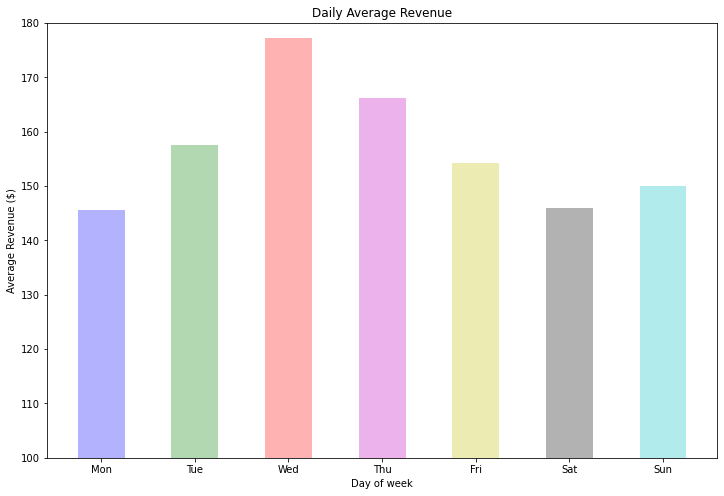

In [8]:
days = ["Mon", "Tue", "Wed", "Thu", "Fri", "Sat", "Sun"]

plt.figure(figsize = (12,8))
plt.bar(np.arange(0, 7), mean_daily_rev_ph.loc[days]['revenue'], width=0.5, linewidth = 2, alpha = 0.3,color = ['b','g','r','m','y','k','c'])

plt.ylim(100,180)
plt.xticks(np.arange(0, 7), days)
plt.title('Daily Average Revenue')
plt.xlabel('Day of week')
plt.ylabel('Average Revenue ($)')


plt.savefig('Fig1 Daily Average Revenue.pdf')

### 1.1.2 Hours

In [9]:
total_rev_each_hour = df_transactions.groupby(["hours_after_open", 'date']).sum()['revenue']
mean_hourly_rev = total_rev_each_hour.reset_index(level=0).groupby('hours_after_open').mean()

mean_hourly_rev

,revenue
hours_after_open,
0,162.827922
1,172.752597
2,166.997403
3,155.794156
4,144.457143
5,138.168627


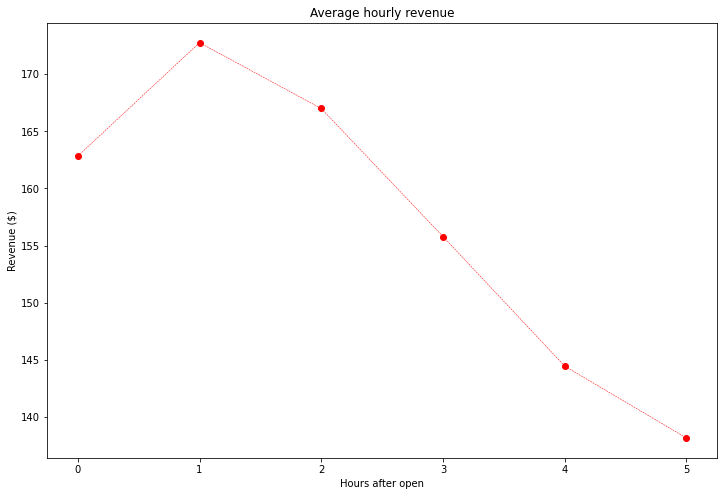

In [10]:
plt.figure(figsize = (12,8))

plt.plot(mean_hourly_rev,color='red', linestyle = '--', marker='o', linewidth=0.5)
plt.title('Average hourly revenue')
plt.xlabel('Hours after open')
plt.ylabel('Revenue ($)')
plt.savefig('Fig2 Average hourly revenue')

## 1.2 Days Since Opened

In [11]:
daily_revenue = df_transactions.groupby("days_after_open").sum()['revenue']

daily_revenue

days_after_open
0       215.2
1       375.8
2       318.6
3       327.9
4       248.8
        ...  
149    2149.6
150    2142.6
151    1747.2
152    1754.7
153    1880.8
Name: revenue, Length: 154, dtype: float64

In [12]:
daily_revenue = df_transactions.groupby("days_after_open").sum()['revenue']
hourly_revenue = daily_revenue/hours_open
hourly_revenue

days_after_open
0       35.866667
1       62.633333
2       53.100000
3       54.650000
4       41.466667
          ...    
149    358.266667
150    357.100000
151    291.200000
152    292.450000
153    313.466667
Name: revenue, Length: 154, dtype: float64

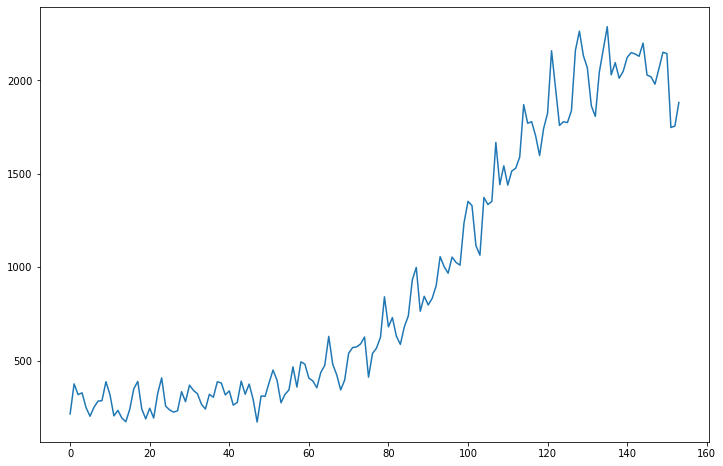

In [13]:
plt.figure(figsize = (12,8))
plt.plot(daily_revenue)

### 1.2.1 Linear Regression

In [14]:
x = daily_revenue.index.values
y = hourly_revenue.to_numpy()

linear_reg = LinearRegression()
linear_reg.fit(x.reshape(-1,1),y) 

linear_reg.intercept_
linear_reg.coef_[0]

print('beta 0: {:.2f}'.format(linear_reg.intercept_))
print('beta 1: {:.2f}'.format(linear_reg.coef_[0]))

beta 0: -31.27
beta 1: 2.46


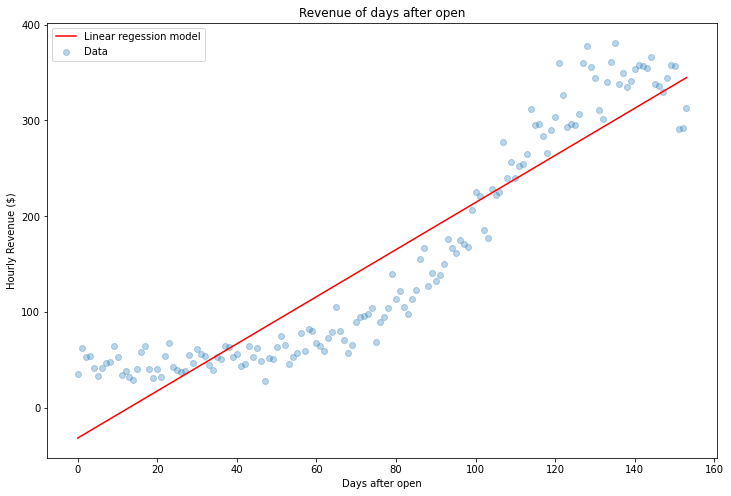

In [15]:
xfit = np.linspace(x.min(), x.max(), 154)
yfit = linear_reg.predict(xfit.reshape(-1,1))

plt.figure(figsize = (12,8))
plt.scatter(x, y, alpha = 0.3, label= 'Data')
plt.plot(xfit, yfit, 'r-', label = 'Linear regession model')
plt.xlabel('Days after open')
plt.ylabel('Hourly Revenue ($)')
plt.title('Revenue of days after open')
plt.legend()
plt.savefig('Fig3 Revenue of days after open')

#### 1.2.2 Polynomial regression

In [16]:
#Transformation
x1 = x**2
x2 = x**3

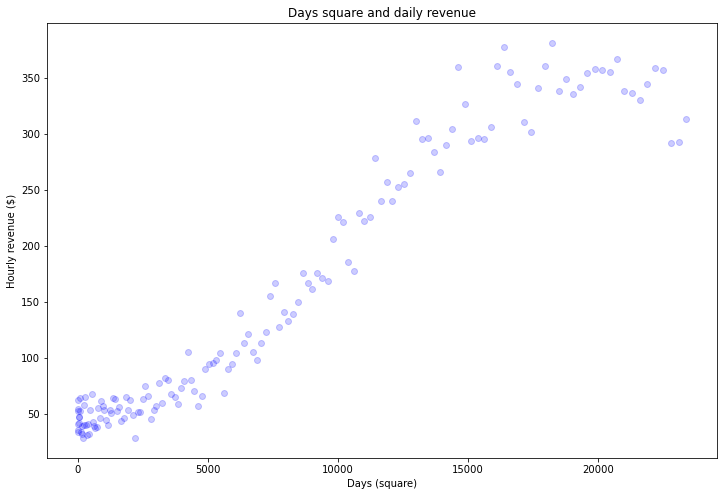

In [17]:
plt.figure(figsize = (12,8))

x1fit = np.linspace(x1.min(), x1.max(), 154)
y1fit = linear_reg.predict(x1fit.reshape(-1,1))

plt.scatter(x1, y, color = 'blue', alpha=0.2)

plt.title('Days square and daily revenue')
plt.xlabel('Days (square)')
plt.ylabel('Hourly revenue ($)')

plt.savefig('Fig4 Daily revenue')

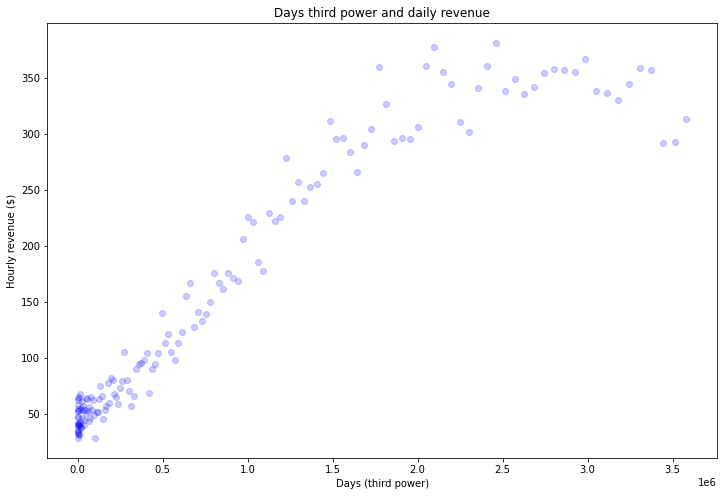

In [18]:
plt.figure(figsize = (12,8))

x1fit = np.linspace(x2.min(), x2.max(), 154)
y1fit = linear_reg.predict(x1fit.reshape(-1,1))

plt.scatter(x2, y, color = 'blue', alpha=0.2)

plt.title('Days third power and daily revenue')
plt.xlabel('Days (third power)')
plt.ylabel('Hourly revenue ($)')

plt.savefig('Fig5 Daily revenue')

## 1.3 Customer Location

In [19]:
df_transactions

,id,date,days_after_open,day_of_week,hours_after_open,drink_id,name,unit_price,quantity,raining,study_area_id,study_area_name,dist_to_cafe,revenue
0,0,2019-07-22,0,Mon,0,5,Flat White (L),4.9,1,No,3,Abercrombie (H70),700,4.9
1,1,2019-07-22,0,Mon,0,5,Flat White (L),4.9,1,No,1,Law Library (F10),84,4.9
2,2,2019-07-22,0,Mon,0,2,Macchiato,3.8,1,No,1,Law Library (F10),84,3.8
3,3,2019-07-22,0,Mon,0,2,Macchiato,3.8,1,No,5,Carslaw (F07),150,3.8
4,4,2019-07-22,0,Mon,0,5,Flat White (L),4.9,1,No,5,Carslaw (F07),150,4.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27166,27709,2019-12-22,153,Sun,5,14,Mocha (S),4.5,2,No,3,Abercrombie (H70),700,9.0
27167,27710,2019-12-22,153,Sun,5,6,Flat White (S),4.0,1,Yes,0,Fisher Library (F03),70,4.0
27168,27711,2019-12-22,153,Sun,5,12,Chai Latte (S),3.6,1,No,1,Law Library (F10),84,3.6
27169,27712,2019-12-22,153,Sun,5,9,Cappuccino (L),4.9,1,Yes,1,Law Library (F10),84,4.9


In [20]:
daily_location_rev = df_transactions.groupby(["study_area_name", 'date']).sum()['revenue']
mean_daily_location_rev = daily_location_rev.reset_index(level=0).groupby('study_area_name').mean()

mean_daily_location_rev

,revenue
study_area_name,
Abercrombie (H70),72.194079
Brennan MacCallum (A18),68.655195
Carslaw (F07),164.060390
Fisher Library (F03),261.519481
Law Library (F10),237.569481
Peter Nicol Russell (PNR),71.294118
The Quarter (A16),66.208442


Text(0.5, 0, 'Revenue ($)')

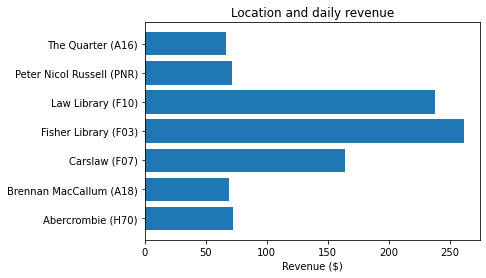

In [21]:
plt.barh(mean_daily_location_rev.index, mean_daily_location_rev['revenue'])

plt.title('Location and daily revenue')
plt.xlabel('Revenue ($)')

### 1.3.1 Interact with Distance

In [22]:
daily_location_rev = df_transactions.groupby(["study_area_name", 'date']).sum()['revenue']
mean_daily_location_rev = daily_location_rev.reset_index(level=0).groupby('study_area_name').mean()
mean_daily_location_rev_ph = mean_daily_location_rev/hours_open
mean_daily_location_rev_ph

,revenue
study_area_name,
Abercrombie (H70),12.032346
Brennan MacCallum (A18),11.442532
Carslaw (F07),27.343398
Fisher Library (F03),43.586580
Law Library (F10),39.594913
Peter Nicol Russell (PNR),11.882353
The Quarter (A16),11.034740


In [23]:
#mdlrd = mean daily location rev distance
mdlrd = df_transactions.groupby(["study_area_name"]).mean()['dist_to_cafe']
mdlrd_sorted = mdlrd.sort_values()
mdlrd_sorted 

study_area_name
Fisher Library (F03)          70.0
Law Library (F10)             84.0
Carslaw (F07)                150.0
Brennan MacCallum (A18)      350.0
The Quarter (A16)            400.0
Abercrombie (H70)            700.0
Peter Nicol Russell (PNR)    950.0
Name: dist_to_cafe, dtype: float64

In [24]:
mean_daily_location_rev_ph['distance'] = mdlrd
mean_daily_location_rev_ph = mean_daily_location_rev_ph.sort_values('distance')['revenue']
mean_daily_location_rev_ph

study_area_name
Fisher Library (F03)         43.586580
Law Library (F10)            39.594913
Carslaw (F07)                27.343398
Brennan MacCallum (A18)      11.442532
The Quarter (A16)            11.034740
Abercrombie (H70)            12.032346
Peter Nicol Russell (PNR)    11.882353
Name: revenue, dtype: float64

In [25]:
mdlrd_sorted,mean_daily_location_rev_ph

(study_area_name
 Fisher Library (F03)          70.0
 Law Library (F10)             84.0
 Carslaw (F07)                150.0
 Brennan MacCallum (A18)      350.0
 The Quarter (A16)            400.0
 Abercrombie (H70)            700.0
 Peter Nicol Russell (PNR)    950.0
 Name: dist_to_cafe, dtype: float64,
 study_area_name
 Fisher Library (F03)         43.586580
 Law Library (F10)            39.594913
 Carslaw (F07)                27.343398
 Brennan MacCallum (A18)      11.442532
 The Quarter (A16)            11.034740
 Abercrombie (H70)            12.032346
 Peter Nicol Russell (PNR)    11.882353
 Name: revenue, dtype: float64)

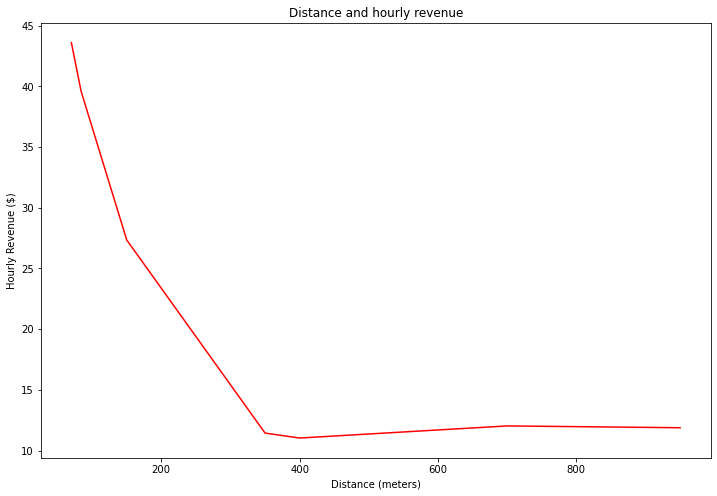

In [26]:
plt.figure(figsize = (12,8))

plt.plot(mdlrd_sorted,mean_daily_location_rev_ph,color = 'red')

plt.title('Distance and hourly revenue')
plt.xlabel('Distance (meters)')
plt.ylabel('Hourly Revenue ($)')

plt.savefig('Fig6 Distance and hourly revenue')

### 1.3.2 Interact with Rain

In [27]:
rainy = df_transactions[df_transactions['raining']=='Yes']
no_rainy = df_transactions[df_transactions['raining']=='No']

In [28]:
daily_location_rev_rainy = rainy.groupby(["study_area_name",'date']).sum()['revenue']
#mdlrr = mean_daily_location_rev_rain
mdlrr = daily_location_rev_rainy.reset_index(level=0).groupby('study_area_name').mean()

mdlrr['rain_or_not'] = mdlrd
mdlrr = mdlrr.sort_values('rain_or_not')['revenue']
mdlrr

study_area_name
Fisher Library (F03)    127.784967
Law Library (F10)       103.839073
Carslaw (F07)            31.042308
Name: revenue, dtype: float64

In [29]:
daily_location_rev_no_rainy = no_rainy.groupby(["study_area_name",'date']).sum()['revenue']
#mdlrnr = mean_daily_location_rev_no_rain
mdlrnr = daily_location_rev_no_rainy.reset_index(level=0).groupby('study_area_name').mean()

mdlrnr['rain_or_not'] = mdlrd
mdlrnr = mdlrnr.sort_values('rain_or_not')['revenue']
mdlrnr

study_area_name
Fisher Library (F03)         134.564286
Law Library (F10)            135.753247
Carslaw (F07)                137.855844
Brennan MacCallum (A18)       68.655195
The Quarter (A16)             66.208442
Abercrombie (H70)             72.194079
Peter Nicol Russell (PNR)     71.294118
Name: revenue, dtype: float64

# 2.Task 2

### 2.1 Description of pre-processing of transformation of variables

### 2.1.1 Choose Variables

In [30]:
cols = ['days_after_open','day_of_week','hours_after_open','name','unit_price','quantity','study_area_name','raining','revenue','dist_to_cafe']
new_df = df_transactions[cols]

In [31]:
new_df_dummy = pd.get_dummies(new_df,drop_first=True)
new_df_dummy 

,days_after_open,hours_after_open,unit_price,quantity,revenue,dist_to_cafe,day_of_week_Mon,day_of_week_Sat,day_of_week_Sun,day_of_week_Thu,...,name_Mocha (L),name_Mocha (S),name_Ristretto,study_area_name_Brennan MacCallum (A18),study_area_name_Carslaw (F07),study_area_name_Fisher Library (F03),study_area_name_Law Library (F10),study_area_name_Peter Nicol Russell (PNR),study_area_name_The Quarter (A16),raining_Yes
0,0,0,4.9,1,4.9,700,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,4.9,1,4.9,84,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
2,0,0,3.8,1,3.8,84,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,0,0,3.8,1,3.8,150,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0
4,0,0,4.9,1,4.9,150,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27166,153,5,4.5,2,9.0,700,0,0,1,0,...,0,1,0,0,0,0,0,0,0,0
27167,153,5,4.0,1,4.0,70,0,0,1,0,...,0,0,0,0,0,1,0,0,0,1
27168,153,5,3.6,1,3.6,84,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
27169,153,5,4.9,1,4.9,84,0,0,1,0,...,0,0,0,0,0,0,1,0,0,1


In [32]:
#Combine date column and hours column into a single one
new_df_dummy['hours'] = df_transactions['date'] + '-' + new_df['hours_after_open'].astype(str)
#reference: https://datascientyst.com/combine-multiple-columns-into-single-one-in-pandas/

new_df_dummy_variables = new_df_dummy.groupby('hours').mean().drop('revenue',axis=1)
new_df_dummy_revenue = new_df_dummy.groupby('hours').sum()['revenue']

new_df_dummy_hours = pd.concat([new_df_dummy_variables, new_df_dummy_revenue],axis=1)
#reference: https://www.geeksforgeeks.org/pandas-concat-function-in-python/
new_df_dummy_hours

,days_after_open,hours_after_open,unit_price,quantity,dist_to_cafe,day_of_week_Mon,day_of_week_Sat,day_of_week_Sun,day_of_week_Thu,day_of_week_Tue,...,name_Mocha (S),name_Ristretto,study_area_name_Brennan MacCallum (A18),study_area_name_Carslaw (F07),study_area_name_Fisher Library (F03),study_area_name_Law Library (F10),study_area_name_Peter Nicol Russell (PNR),study_area_name_The Quarter (A16),raining_Yes,revenue
hours,,,,,,,,,,,,,,,,,,,,,
2019-07-22-0,0.0,0.0,4.454545,1.090909,264.181818,1.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.272727,0.090909,0.363636,0.090909,0.090909,0.272727,52.8
2019-07-22-1,0.0,1.0,4.016667,1.000000,254.833333,1.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.333333,0.166667,0.166667,0.083333,0.250000,0.083333,48.2
2019-07-22-2,0.0,2.0,4.600000,1.000000,294.000000,1.0,0.0,0.0,0.0,0.0,...,0.000000,0.200000,0.000000,0.400000,0.200000,0.000000,0.000000,0.200000,0.000000,23.0
2019-07-22-3,0.0,3.0,4.011111,1.000000,123.555556,1.0,0.0,0.0,0.0,0.0,...,0.000000,0.111111,0.111111,0.222222,0.333333,0.333333,0.000000,0.000000,0.111111,36.1
2019-07-22-4,0.0,4.0,4.100000,1.666667,390.000000,1.0,0.0,0.0,0.0,0.0,...,0.333333,0.000000,0.000000,0.000000,0.333333,0.000000,0.000000,0.333333,0.000000,20.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-12-22-1,153.0,1.0,4.431746,1.206349,244.126984,0.0,0.0,1.0,0.0,0.0,...,0.047619,0.031746,0.095238,0.269841,0.174603,0.238095,0.063492,0.111111,0.142857,333.7
2019-12-22-2,153.0,2.0,4.226667,1.366667,301.233333,0.0,0.0,1.0,0.0,0.0,...,0.050000,0.016667,0.050000,0.200000,0.250000,0.183333,0.116667,0.100000,0.266667,347.9
2019-12-22-3,153.0,3.0,4.254000,1.320000,287.160000,0.0,0.0,1.0,0.0,0.0,...,0.060000,0.120000,0.060000,0.220000,0.200000,0.240000,0.060000,0.040000,0.160000,279.1


In [33]:
new_df_dummy_hours.describe()

,days_after_open,hours_after_open,unit_price,quantity,dist_to_cafe,day_of_week_Mon,day_of_week_Sat,day_of_week_Sun,day_of_week_Thu,day_of_week_Tue,...,name_Mocha (S),name_Ristretto,study_area_name_Brennan MacCallum (A18),study_area_name_Carslaw (F07),study_area_name_Fisher Library (F03),study_area_name_Law Library (F10),study_area_name_Peter Nicol Russell (PNR),study_area_name_The Quarter (A16),raining_Yes,revenue
count,923.000000,923.000000,923.000000,923.000000,923.000000,923.000000,923.000000,923.000000,923.000000,923.000000,...,923.000000,923.000000,923.000000,923.000000,923.000000,923.000000,923.000000,923.000000,923.000000,923.000000
mean,76.562297,2.497291,4.208356,1.269910,247.461333,0.143012,0.141928,0.143012,0.143012,0.143012,...,0.058576,0.055449,0.079076,0.170652,0.271759,0.252614,0.074502,0.076034,0.260667,156.853196
std,44.462873,1.707691,0.149354,0.183875,67.989039,0.350275,0.349166,0.350275,0.350275,0.350275,...,0.062640,0.063583,0.079477,0.097364,0.121138,0.121682,0.068402,0.075491,0.159906,120.087968
min,0.000000,0.000000,3.633333,1.000000,74.666667,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000
25%,38.000000,1.000000,4.129844,1.168440,206.376068,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.016685,0.115069,0.200000,0.181818,0.000000,0.000000,0.145380,56.700000
50%,77.000000,2.000000,4.204167,1.253333,242.941176,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.050000,0.045455,0.066667,0.166667,0.272727,0.250000,0.066667,0.066667,0.250000,103.800000
75%,115.000000,4.000000,4.284070,1.333333,285.721289,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.090909,0.083333,0.111111,0.222222,0.333333,0.312500,0.109091,0.107418,0.362194,269.300000
max,153.000000,5.000000,4.900000,4.000000,525.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,0.666667,0.500000,1.000000,1.000000,0.666667,1.000000,0.500000,0.666667,1.000000,448.900000


In [34]:
new_df.groupby('name').sum()['revenue'].sort_values()

name
Ristretto             6184.2
Espresso              7164.5
Chai Latte (S)        7351.2
Hot Chocolate (S)     7432.8
Macchiato             7763.4
Long Black (S)        7820.4
Long Black (L)        7924.0
Cappuccino (S)        8088.0
Latte (S)             8156.0
Flat White (S)        8392.0
Chai Latte (L)        9037.6
Hot Chocolate (L)     9209.2
Mocha (S)             9459.0
Latte (L)             9594.2
Flat White (L)        9932.3
Cappuccino (L)       10304.7
Mocha (L)            10962.0
Name: revenue, dtype: float64

In [35]:
new_df_dummy_hours.corr()['revenue']

days_after_open                              0.909490
hours_after_open                            -0.089096
unit_price                                  -0.018572
quantity                                     0.054654
dist_to_cafe                                -0.070309
day_of_week_Mon                             -0.038115
day_of_week_Sat                             -0.033248
day_of_week_Sun                             -0.023575
day_of_week_Thu                              0.032042
day_of_week_Tue                              0.002155
day_of_week_Wed                              0.069571
name_Cappuccino (S)                         -0.004753
name_Chai Latte (L)                         -0.010653
name_Chai Latte (S)                          0.031241
name_Espresso                                0.095884
name_Flat White (L)                          0.014369
name_Flat White (S)                          0.012845
name_Hot Chocolate (L)                      -0.067981
name_Hot Chocolate (S)      

My independent varibales are 'days_after_open','name_Mocha (L)','name_Latte (S)','name_Flat White (S)','name_Hot Chocolate (L)','name_Ristretto'. 

In [36]:
listofcolumns = ['days_after_open','name_Mocha (L)','name_Latte (S)','name_Flat White (S)','name_Hot Chocolate (L)','name_Ristretto']

x = new_df_dummy_hours[listofcolumns]

y = new_df_dummy_hours['revenue'].to_numpy()

#### EDA- Heatmap

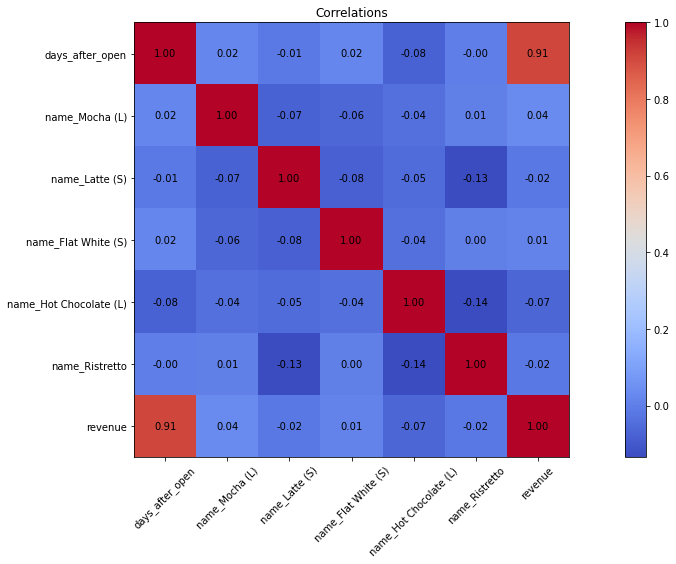

In [37]:
corr = new_df_dummy_hours[['days_after_open','name_Mocha (L)','name_Latte (S)','name_Flat White (S)','name_Hot Chocolate (L)','name_Ristretto','revenue']].corr()
n_var = len(corr)
plt.figure(figsize = (20,8))
plt.xticks(rotation = 45)
plt.imshow(corr, cmap = 'coolwarm')
plt.xticks(range(n_var), corr.columns)
plt.yticks(range(n_var), corr.columns)

for i in range(n_var):
    for j in range (n_var):
        plt.text(i, j, '{:.2f}'.format(corr.iloc[i, j]), ha='center', va='center', color='k', fontsize = 10)
        
plt.colorbar()
plt.title('Correlations')
plt.savefig('Fig7 Correlation.pdf')


In [38]:
x['days_after_open^2'] = x['days_after_open']**2
x['days_after_open^3'] = x['days_after_open']**3
x['days_after_open^4'] = x['days_after_open']**4
x['days_after_open^5'] = x['days_after_open']**5

In [39]:
x_tv, x_test, y_tv, y_test = train_test_split(x, y, random_state = 1, test_size = 0.25)
x_train, x_vali, y_train, y_vali = train_test_split(x_tv, y_tv, random_state = 1, test_size = 0.25)

print('Test:', x_test.shape)
print('Training:', x_train.shape)
print('Validation:', x_vali.shape)

Test: (231, 10)
Training: (519, 10)
Validation: (173, 10)


In [40]:
linear_reg = LinearRegression()
linear_reg.fit(x_train,y_train)
pred_train = linear_reg.predict(x_train)
pred_vali = linear_reg.predict(x_vali)

mse_train = mse(y_train, pred_train)
mse_vali = mse(y_vali, pred_vali)

print("Train mse: {:.4f}".format(mse_train))
print("Validation mse: {:.4f}".format(mse_vali))

Train mse: 822.7463
Validation mse: 845.5337


In [41]:
corr_matrix = np.corrcoef(y_train, pred_train)
corr = corr_matrix[0,1]
R_sq = corr**2
# reference: https://www.askpython.com/python/coefficient-of-determination

print('R Squared:', R_sq)

R Squared: 0.9428627972791319


In [42]:
x_train_1 = x_train.drop('days_after_open^5', axis = 1)
x_vali_1 = x_vali.drop('days_after_open^5', axis = 1)

linear_reg_1 = LinearRegression()

linear_reg_1.fit(x_train_1, y_train)

pred_train_1 = linear_reg_1.predict(x_train_1)
pred_vali_1 = linear_reg_1.predict(x_vali_1)

print('Training:', x_train_1.shape)
print('Validation:', x_vali_1.shape)


Training: (519, 9)
Validation: (173, 9)


In [43]:
mse_train_1 = mse(y_train, pred_train_1)
mse_vali_1 = mse(y_vali, pred_vali_1)

print("Train mse: {:.4f}".format(mse_train_1))
print("Validation mse: {:.4f}".format(mse_vali_1))

Train mse: 862.3121
Validation mse: 876.0923


In [44]:
corr_matrix_1 = np.corrcoef(y_train, pred_train_1)
corr_1 = corr_matrix_1[0,1]
R_sq_1 = corr_1**2
print('R Squared:', R_sq_1)

R Squared: 0.9401150730414822


The previous one has lower Mse and higher R Squared.

In [45]:
x_train_model = x_train
x_test_model = x_test
x_train_model.shape

(519, 10)

In [46]:
linear_reg_model = LinearRegression()
linear_reg_model.fit(x_train_model,y_train)

pred_test_model = linear_reg_model.predict(x_test_model)

mse_test = mse(y_test, pred_test_model)

print("Test MSE: {:.4f}".format(mse_test))

Test MSE: 1033.1584


In [47]:
print('beta 0: {:.8f}'.format(linear_reg_model.intercept_))
for i in range(10):
    print('beta {}: {:.8f}'.format(i+1, linear_reg_model.coef_[i]))

beta 0: 48.16885591
beta 1: -0.93235194
beta 2: 37.61597622
beta 3: 22.99141842
beta 4: 6.63248457
beta 5: 0.97441895
beta 6: -41.65916383
beta 7: 0.05859475
beta 8: -0.00144671
beta 9: 0.00001733
beta 10: -0.00000006


In [48]:
x_train_model.columns

Index(['days_after_open', 'name_Mocha (L)', 'name_Latte (S)',
       'name_Flat White (S)', 'name_Hot Chocolate (L)', 'name_Ristretto',
       'days_after_open^2', 'days_after_open^3', 'days_after_open^4',
       'days_after_open^5'],
      dtype='object')